# Median House Value Assesment Activity

Daniel Mínguez Camacho  
Javier de la Rúa Martínez

<div class="pagebreak"></div>

# 1 Introduction

This document is created as an assignment for Deep Learning course at Universidad Politécnica de Madrid. The aim of this report is describing the actions performed during the implementation of a deep network using tensorflow. 

The first section contains a description of how we installed the programming environment and the required libraries. The next section presents the problem and the data used. After that, we describe how we built the network and the results. Finally, we present a short conclusion of our experience during the work performed. 

# 2 Design process

## 2.1 Installation

We have decided to use Anaconda as our programming environment. The installation process was as follows:

    1. Anaconda download and installation, we downloaded Anaconda from the official webpage (https://www.anaconda.com/distribution/) and installed it following the steps of the program.
    3. Libraries installation, after that, we installed the following libraries used in the notebook:    

In [1]:
import sys
# !conda install --yes --prefix {sys.prefix} matplotlib
# !conda install --yes --prefix {sys.prefix} tqdm
# !conda install --yes --prefix {sys.prefix} tensorflow-gpu
# !conda install --yes --prefix {sys.prefix} keras-gpu

    4. Test of tensorflow, after the installation we executed the test program provided in class (matrix multiplication) in order to check that tensorflow was working properly

## 2.2 Problem

This California Housing Prices dataset has been downloaded from StatLib repository (http://lib.stat.cmu.edu/datasets/). It is based on data from the 1990 California census, what is not important for deep learning. The original dataset appeared in R. Kelley Pace and Ronald Barry, “Sparse Spatial Autoregressions,” Statistics & Probability Letters 33, no. 3 (1997): 291–297.

The problem proposed to solve in this assignment is to predict the house value based on the others variables present in the dataset.

## 2.2 Data used

We have used the files MedianHouseValuePreparedCleanAttributes.csv and MedianHouseValueOneHotEncodedClasses.csv as described in the assignment description.

<b>MedianHouseValuePreparedCleanAttributes.csv</b><br>The original dataset contained 20,640 instances corresponding to districts in california ranging from 600 to 3.000 people. This dataset has been previously cleaned, preprocessed and prepared with the following operations:

    - Total_bedrooms attribute has 207 missing values, (na or nan), which are removed since they are very little compared to the whole dataset.
    - ISLAND has only 5 samples, not enough to generalize. This class is removed.
    - Dataset is randomized.
    - Classes are encoded: first discretized and then one-hot encoded.
    - Attributes are individually re-scaled, normalized with a min-max scaling within the range [-1,1]: x-(max/2) / (max-min)/2.
    - The correlation matrix between all pairs of attributes has been calculated to visualize their dependencies. The results achieved report that total_rooms, total_bedrooms, population and households are highly (positive) correlated.
    
After this phase of data preparation, a final dataset of 20,433 instances are obtained with 8 attributes (InputsMedianHouseValueNormalized.csv): $longitude$ and $latitude$ (location), $median age$, $total rooms$, $total bedrooms$, $population$, $households$ and $median income$.  

From this data, the classification problem consists on estimating the median house value, categorized into the following 10 clases (price intervals in thousand dollards): [15.0, 82.3], [82.4, 107.3], [107.4, 133.9], [134.0, 157.3], [157.4, 179.7], [179.8, 209.4], [209.5, 241.9], [242.0, 290.0], [290.1, 376.6] and [376.7, 500.0]. Each class is labelled from 0 (the cheapest) to 9 (the most expensive), and one-hot encoded in <b>MedianHouseValueOneHotEncodedClasses.csv</b> file.

## 2.3 Process followed

During the development process we used the following approach:

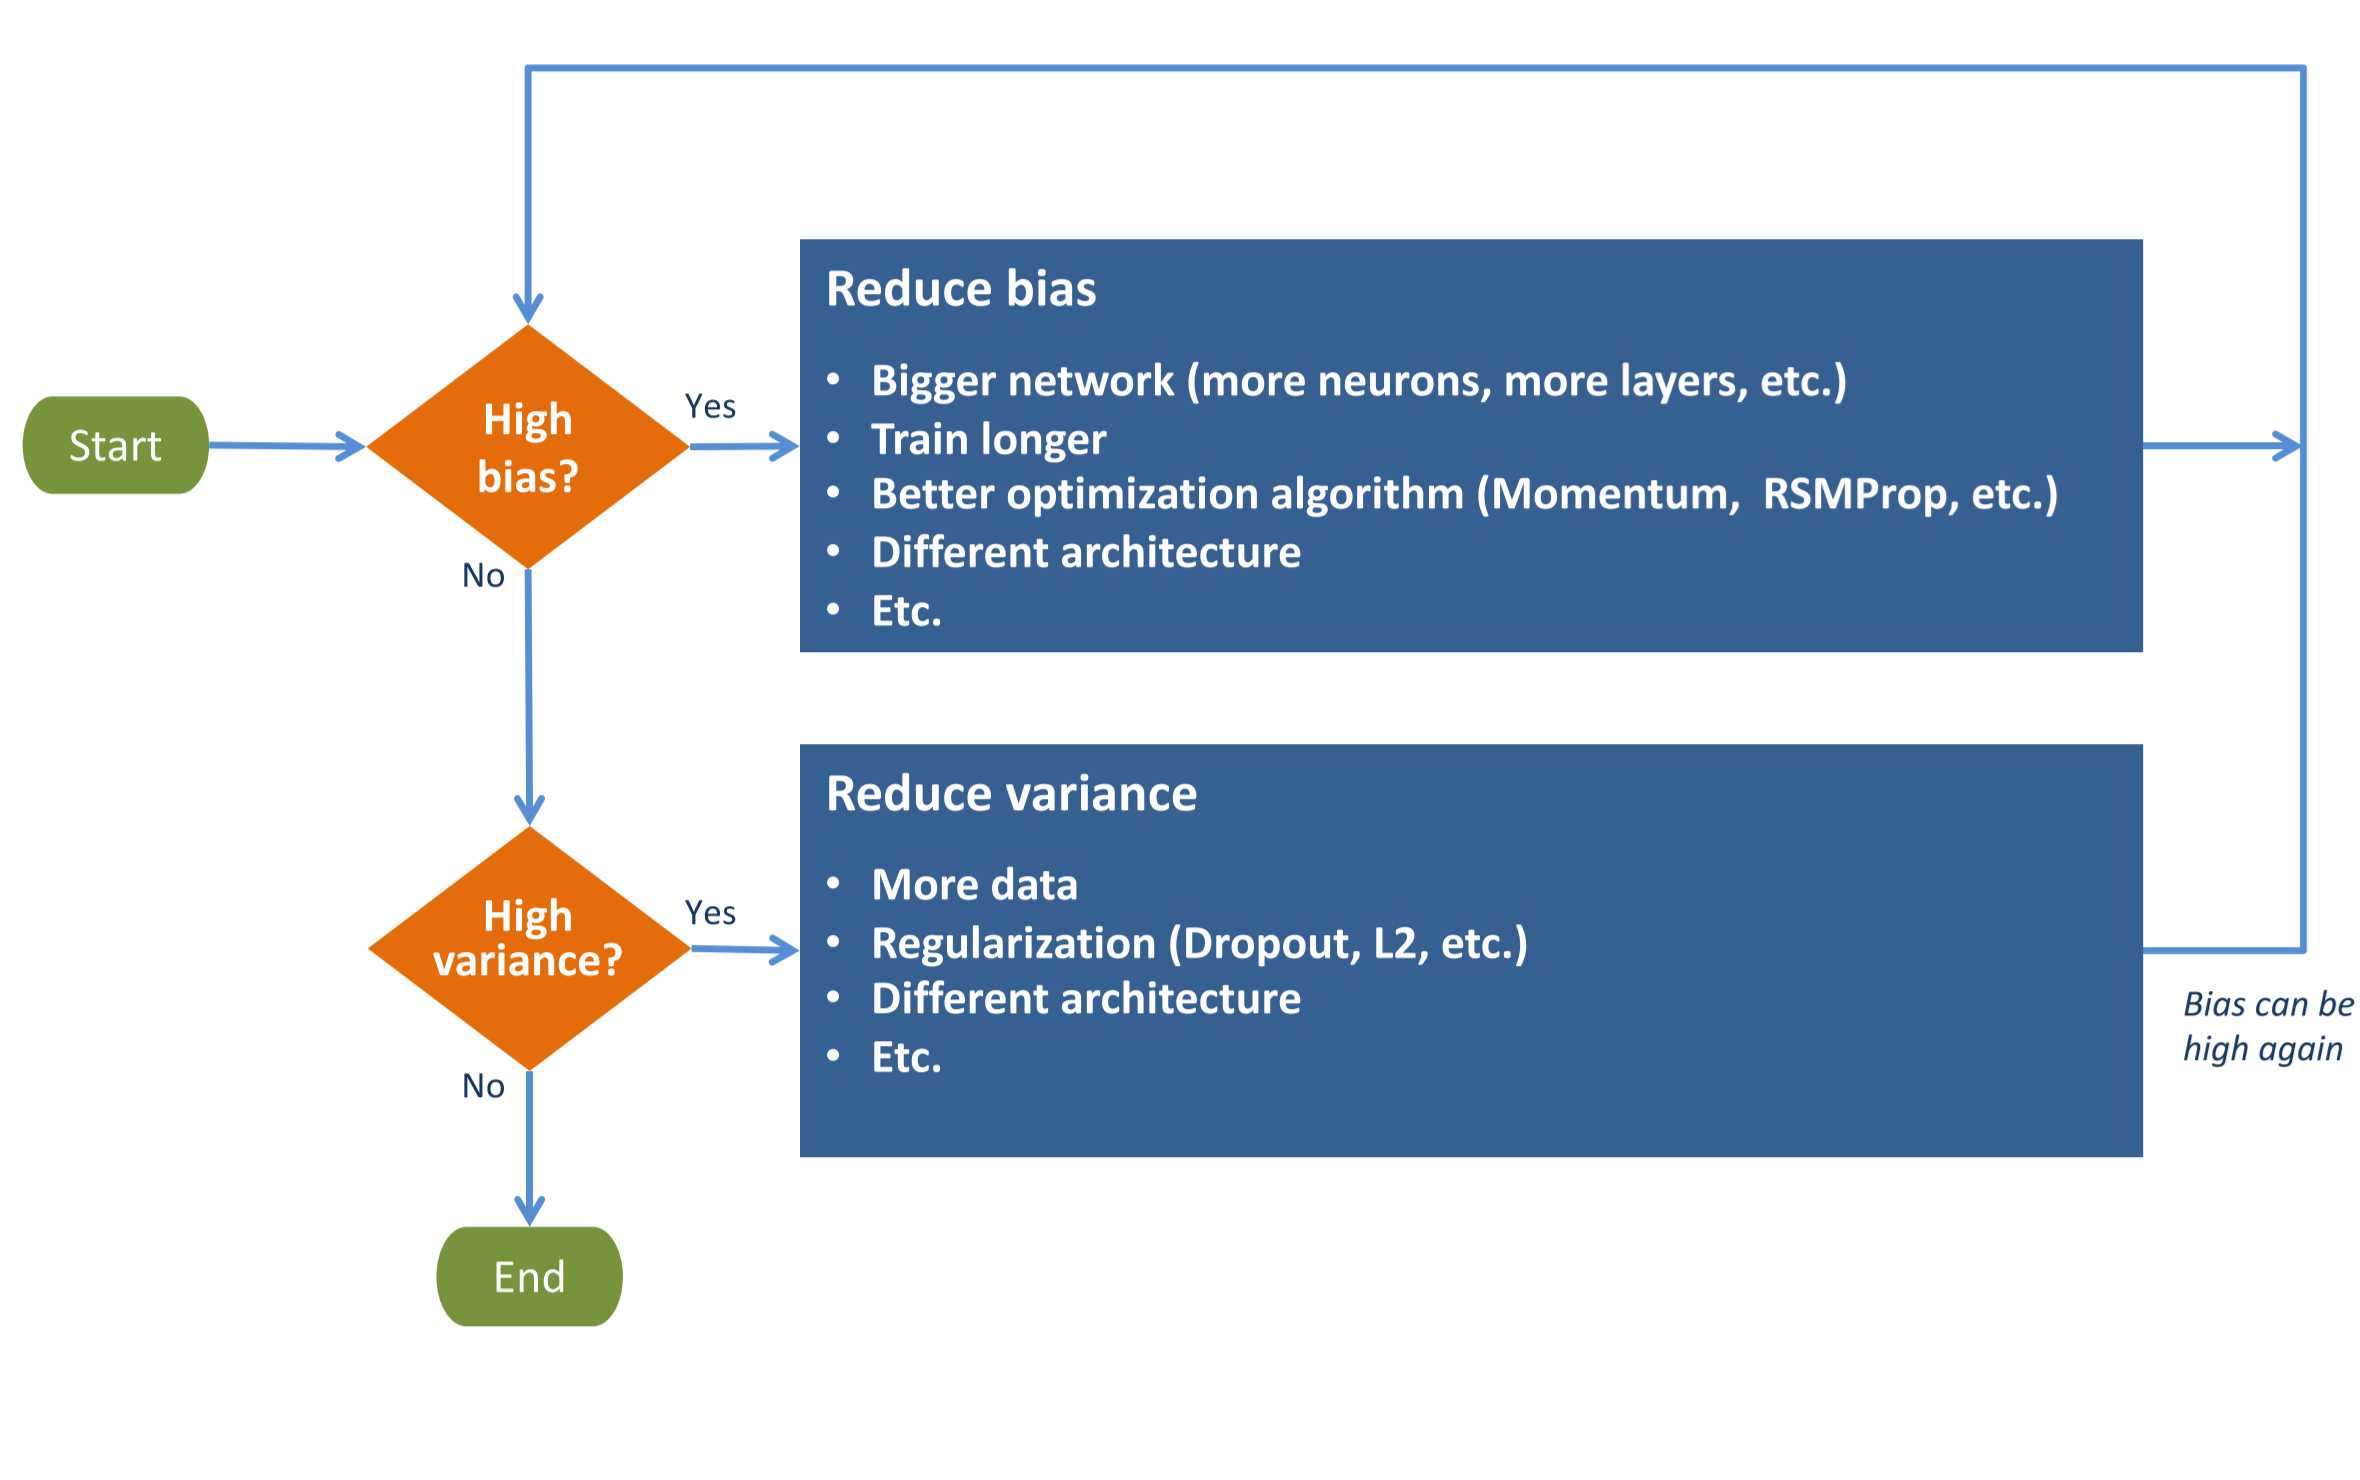
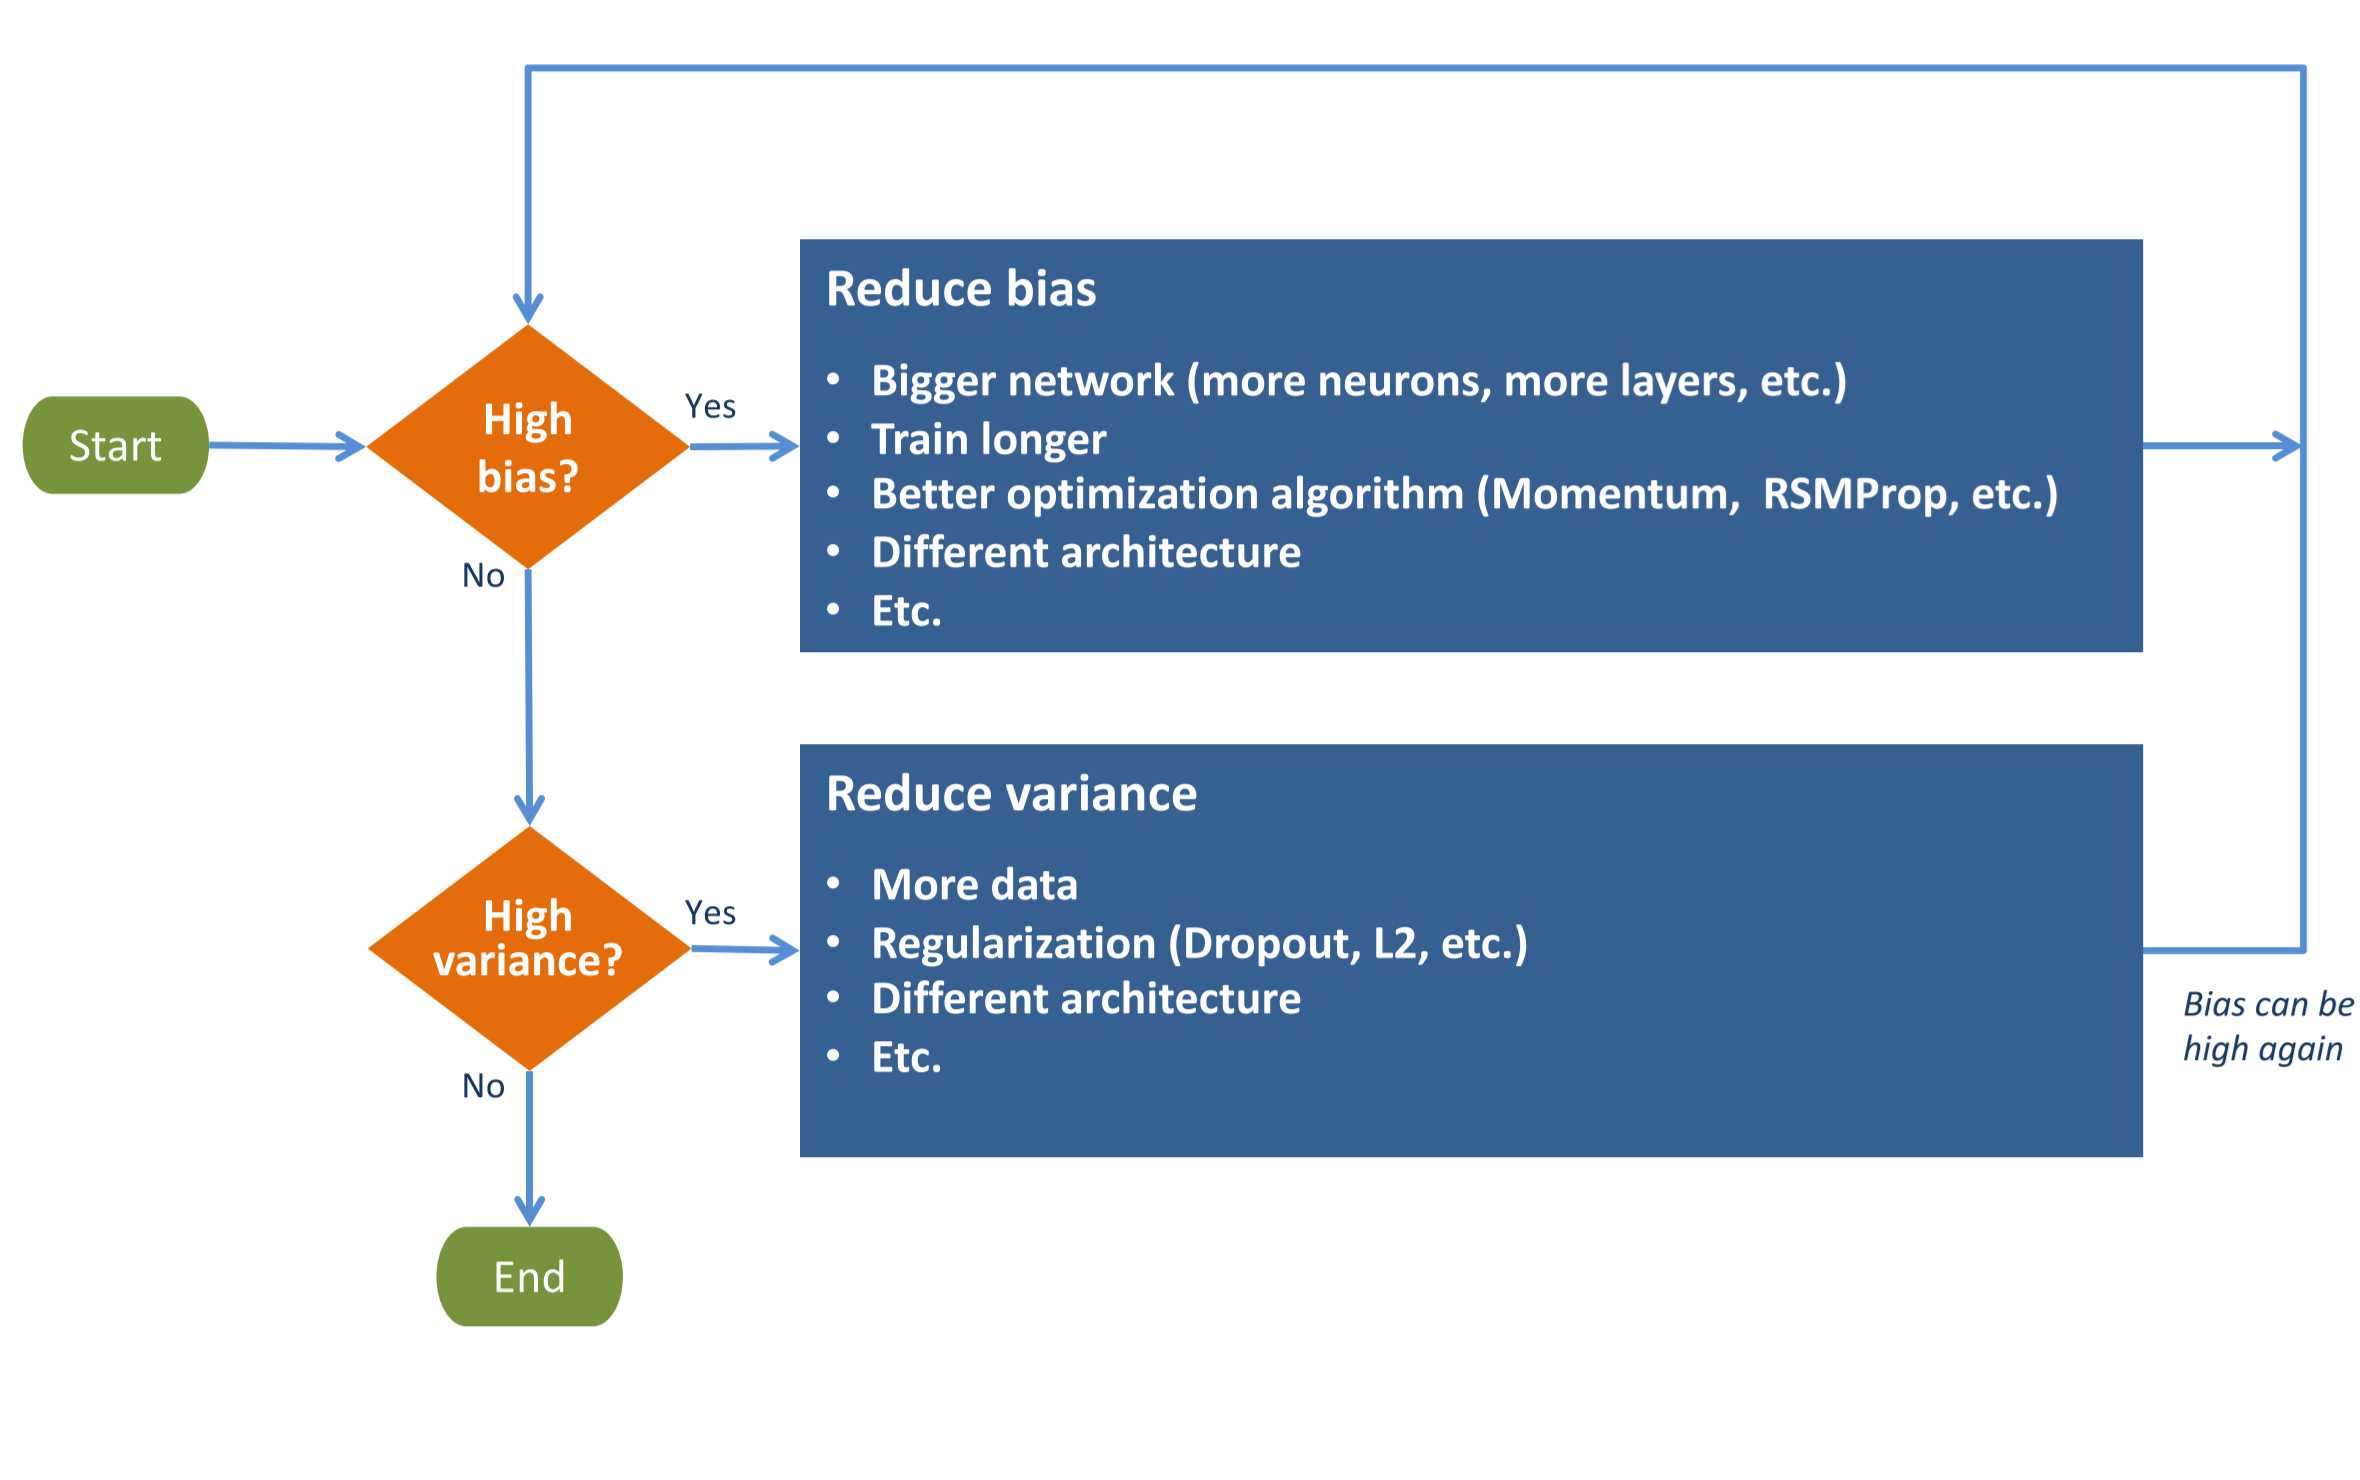

Activation functions tried:

    - Softmax
    - Sigmoid
    - Tanh
    - Relu
    - ELU
    - Leaky Relu
    - Hyperbolic tangent
    
Loss functions tried:

    - Cross-entropy
    
Techniques:

    - Gradient descent (alpha = 0.1)
    - Mini-batch gradient descent (alpha = 0.1)
    - Momentum
    - RMSprop

Normalization

    - Dropout
    - Regularization of inputs --> Predone
    - Min-Max scaling --> Predone
    - Standarization --> Not done because min-max
    - Activation functions (tf.nn.relu, tf.nn.elu, leaky_relu)
    - Weights initialize
    - Different architecture --> Tried (500 - 300-300-150-100-75-25-10) / (300-300-150-100-75-25-10) / (150-100-75-25-10)

Parameters

    - Weights update --> Online or mini batch updating
    - Stop condition
    - Learning rate (Alpha)
    - Mini-batch size
    - Neurons structure
    
   
    
Metrics:

    - Accuracy
    - Precision
    - Recall
    - Specifity

## 2.4 Final Network 

### 2.3.1 Libraries used

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
# from tqdm import tqdm
# from keras.layers import Dense, Activation

### 2.3.2 Data read

In [2]:
run 1.ReadingData.py

x_train: (16346, 8)
t_train: (16346, 10)
x_dev: (2043, 8)
t_dev: (2043, 10)
x_test: (2044, 8)
t_test: (2044, 10)


### 2.3.3 Network Initialization

In [3]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))
NUM_TEST_EXAMPLES = int (round (x_test.shape[0]/1))

### 2.3.4 Hyperparameters selected

Some hyperparameters given as example (they may not be the right ones):

In [4]:
# n_epochs = 25000
# learning_rate = 0.01
# batch_size = 300
# neurons = [[500, 300, 300, 150,75,25,10],[300,150,75,25,10]]

### 2.3.5 Network construction

In [40]:
def dense_layer(input, channels_in, channels_out, batch_norm, activation, dropout, training, initb, initw, name="dense"):
    with tf.name_scope(name):
        
        if initw == "RUniform":
            w = tf.Variable(tf.random_uniform([channels_in, channels_out], minval=-0.5, maxval = 0.5),name = "W")
        elif initw == "Xavier_Normal":
            w = tf.Variable(tf.glorot_normal_initializer()((channels_in, channels_out)),name = "W")
        elif initw == "Xavier_Uniform":
            w = tf.Variable(tf.glorot_uniform_initializer()((channels_in, channels_out)),name = "W")
        elif initw == "RNormal":
            w = tf.Variable(tf.random_normal([channels_in, channels_out], stddev=0.5),name = "W")
        elif initw == "TNormal":
            w = tf.Variable(tf.truncated_normal([channels_in, channels_out], stddev=0.5),name = "W")

        if initb == "zero":
            b = tf.Variable(tf.constant(0.1, shape = [channels_out]), name = "b")
        elif initb == "const":
            b = tf.Variable(tf.zeros(shape = [channels_out]), name = "b")
            
        prev_layer = input

        if activation == "relu":
            prev_layer = tf.nn.relu(tf.matmul(prev_layer, w) + b)
        elif activation == "elu":
            prev_layer = tf.nn.elu(tf.matmul(prev_layer, w) + b)
        elif activation == "leakyrelu":
            prev_layer = tf.nn.leaky_relu(tf.matmul(prev_layer, w) + b)
        elif activation == "softmax":
            prev_layer = tf.nn.softmax(tf.matmul(prev_layer, w) + b)
        elif activation == "sigmoid":
            prev_layer = tf.nn.sigmoid(tf.matmul(prev_layer, w) + b)
        elif activation == "tanh":
            prev_layer = tf.nn.tanh(tf.matmul(prev_layer, w) + b)

        if batch_norm:
            prev_layer = tf.layers.batch_normalization(prev_layer, training=training) 
            
        if dropout:
            prev_layer = tf.nn.dropout(prev_layer, rate = 0.25)

        tf.summary.histogram("weights", w)
        tf.summary.histogram("bias", b)
        tf.summary.histogram("act", prev_layer)
        
        return prev_layer, w
#         act = tf.layers.dense (_input_,output, activation = tf.nn.relu)
#         return act

In [33]:
def create_run_model(inputs, outputs, learning_rate, n_neurons, 
                     batch_norm, activation, loss_fun, 
                     dropout,optimizer, initb, initw, l2, writer_train, writer_test):
    g = create_graph(inputs, outputs, learning_rate, n_neurons,batch_norm,
                     activation, loss_fun, dropout, optimizer, initb, initw, l2)
    run_model(writer_train, writer_test, g)

In [38]:
def create_graph(inputs, outputs, learning_rate, n_neuron,batch_norm, activation, 
                 loss_fun, dropout, optimizer, initb, initw, l2):
    # 1. Feedforward part

    g1 = tf.Graph()
    with g1.as_default() as g:

        training = tf.placeholder_with_default (False, shape=(), name = "training") #for batch norm.
        X = tf.placeholder (dtype=tf.float32, shape=(None,inputs),name="X")  #Data
        t = tf.placeholder (dtype=tf.float32, shape=(None,outputs), name="Labels")  #Labels

        # Start the network

        # 1.1. Add input
        w = []
        hidden_layers = []
        layers_temp, w_temp = dense_layer(X,inputs, n_neurons[0], batch_norm, activation, dropout, training, initb, initw)
        
        hidden_layers.append(layers_temp)
        w.append(w_temp)
        
        # 1.2 Add layers

        for layer in range(1,len(n_neurons)):
            layers_temp, w_temp = dense_layer(hidden_layers[layer-1],
                                             n_neurons[layer-1],
                                             n_neurons[layer],
                                             batch_norm, activation, dropout, training, initb, initw)
            hidden_layers.append(layers_temp)
            w.append(w_temp)

        # 1.3 Add output
        layers_temp, w_temp = dense_layer(hidden_layers[len(n_neurons)-1],
                                          n_neurons[-1],
                                          outputs,False, "None", False, training, initb, initw)
        net_out = layers_temp
        w.append(w_temp)

        y = tf.nn.softmax(logits=net_out, name="y")

        # 1.4 Cost function
        beta = 0.01
        with tf.name_scope("Cost"):
            if loss_fun == "softmax":
                cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2 (labels=t, logits=net_out)
            elif loss_fun == "sigmoid":
                cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=t, logits=net_out)
            # Loss function with L2 Regularization with beta=0.01
            if l2 == True:
                regularizers =tf.nn.l2_loss(w[0])
                for i in range(1,len(w)):
                    regularizers =  regularizers + tf.nn.l2_loss(w[i])
                mean_log_loss = tf.reduce_mean(cross_entropy + beta * regularizers, name="mean_log_loss")    
            else:
                mean_log_loss = tf.reduce_mean (cross_entropy, name="mean_log_loss")
            

        
        # 1.5 Training method

        # GradientDescentOptimizer
        
        with tf.name_scope("train"):
            if optimizer == "Adam":
                train_step = tf.train.AdamOptimizer(learning_rate).minimize(mean_log_loss)
            elif optimizer == "RMSPROP":
                train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(mean_log_loss)
            elif optimizer == "momentum":
                train_step = tf.train.MomentumOptimizer(learning_rate,0.9).minimize(mean_log_loss)
            elif optimizer == "gradient_desc":
                train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(mean_log_loss)

        # 1.6 Accuracy evaluation
        with tf.name_scope("Evaluation"):
            correct_predictions = tf.equal(tf.argmax(y,1),tf.argmax(t,1))
            accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))
            

        
        # 1.7 Reporting purposes

        tf.summary.scalar("cross_entropy", mean_log_loss)
        tf.summary.scalar("accuracy", accuracy)

        merged_summary = tf.summary.merge_all()

        g.add_to_collection("elements", training)
        g.add_to_collection("elements", X)
        g.add_to_collection("elements", t)
        g.add_to_collection("elements", y)
        g.add_to_collection("elements", mean_log_loss)
        g.add_to_collection("elements", train_step)
        g.add_to_collection("elements", correct_predictions)
        g.add_to_collection("elements", accuracy)
        g.add_to_collection("elements", merged_summary)
#     return X, t, y, mean_log_loss, train_step, correct_predictions, accuracy, merged_summary
    return g1

### 2.3.6 Execution

In [27]:
def run_model(writer_test, writer_train, g):
    # 2. Training

    # Pending bucles para historicos con learning rates, estructuras.....
    # Aleatorizar los batch
    # Añadir test summary
    #Partir en validation/test/train

    # 2.1 Setup variables

    accuracy_train_history = []
    n_epochs = 16000
    batch_size = 400

    # 2.2 Session
#  X, t, y, mean_log_loss, train_step, correct_predictions, accuracy, merged_summary
    with tf.Session(graph = g) as sess:
        
#         merged_summary = tf.get_default_graph().get_operation_by_name("merged_summary")

        sess.run(tf.global_variables_initializer())
        writer_train.add_graph(sess.graph)
        writer_test.add_graph(sess.graph)
#         print(sess.graph.get_operations())
#         print("-----------------------------------------")
#         print("-----------------------------------------")
#         print("-----------------------------------------")
#         print("-----------------------------------------")
#         print("-----------------------------------------")
#         print([n.name for n in tf.get_default_graph().as_graph_def().node])
        training, X, t, y, mean_log_loss, train_step, correct_predictions, accuracy, merged_summary = g.get_collection("elements")
#         print(accuracy)
        test_feed = {training: False, X: x_test[:NUM_TEST_EXAMPLES],t: t_test[:NUM_TEST_EXAMPLES]}
        train_feed = {training: False, X: x_train[:NUM_TRAINING_EXAMPLES], t: t_train[:NUM_TRAINING_EXAMPLES]}
        for epoch in range(n_epochs):
            # We run a step every epoch of a part of the dataset (we only pass through the dataset once)
            
            offset = np.random.randint(0,NUM_TRAINING_EXAMPLES,300)

            feed = {training: True, X: x_train[offset], t: t_train[offset]}
            feed_eval = {training: False, X: x_train[offset], t: t_train[offset]}

#             print(feed)
            if epoch % 10 == 0:
                s_train = sess.run(merged_summary, feed_dict=feed_eval)
                s_test = sess.run(merged_summary, feed_dict=test_feed)
                writer_train.add_summary(s_train,epoch)
                writer_test.add_summary(s_test,epoch)

            if epoch % 500 == 0:
                train_accuracy = sess.run(accuracy, feed_dict=feed_eval)
                test_accuracy = sess.run(accuracy, feed_dict=test_feed)
                print("step %d, training accuracy %g, test accuracy %g" % (epoch, train_accuracy, test_accuracy))     
            #Placeholder para leraning rate
            sess.run (train_step, feed_dict=feed)

        accuracy_test = accuracy.eval(feed_dict=test_feed)
        accuracy_train = accuracy.eval(feed_dict=train_feed)

        test_predictions = y.eval(feed_dict={X: x_test[:NUM_TEST_EXAMPLES]})
        test_correct_preditions = correct_predictions.eval (feed_dict=test_feed)

        train_mean_log_loss = mean_log_loss.eval(feed_dict = test_feed)
        test_mean_log_loss = mean_log_loss.eval(feed_dict = test_feed)
        
        sess.close()

In [31]:
def make_hparam_string(initb, initw, learning_rate, n_neurons, batch_norm, optimizer, activation, loss_fun, dropout, l2):
    output = "learning_rate = " + str(learning_rate) + ", neurons = " + str(n_neurons) + \
            ", batch_norm =" + str(batch_norm) + ", opt = " + str(optimizer) + ", act = " + str(activation) + \
            ", loss = " + str(loss_fun) + ", drop = " + str(dropout) + ", binit = " + str(initb) + \
            ", winit = " + str(initw) + ", l2 = " + str(l2)
    
    return  output

In [41]:
# neurons = [[500, 300, 300, 150,75,25,10],[300,150,75,25,10], [100,300,500,400,200,100,50,10], [150,75,25,10],[300,150,75]]
# Probar spiking, piramide y ensemble
neurons = [[500, 300, 300, 150,75,25,10]]
rates = [1E-3]
# WInit = ["Xavier_Normal", "Xavier_Uniform","RUniform",  "RNormal", "TNormal"]
WInit = ["Xavier_Uniform"]
# BInit = ["zero", "const"]
BInit = ["const"]
# rates = [1E-1, 1E-2, 1E-3, 1E-4]
# opt = ["Adam", "RMSPROP", "momentum", "gradient_desc"]
# act = ["relu", "elu", "leakyrelu", "softmax", "sigmoid", "tanh"]
# loss = ["softmax", "sigmoid"]
# batch_norm = [True, False]
# dropout = [True, False]
l2 = True
i = 24
for optimizer in ["Adam"]:
    for activation in ["elu"]:
        for loss_fun in ["softmax"]:
            for initb in BInit:
                for initw in WInit:
                    for batch_norm in [False]:
                        for dropout in [False]:
                            for learning_rate in rates:
                                for n_neurons in neurons:
                                    hparam_str = make_hparam_string(initb, initw, learning_rate, n_neurons, batch_norm, \
                                                                    optimizer, activation, loss_fun, dropout, l2)
                                    i = i + 1
                                    print("----------------------------")
                                    print("MODEL " + hparam_str)
                                    print("----------------------------")      

                                    writer_train = tf.summary.FileWriter("/TF_Logs/20190604_2/" + str(i) + " Train " + hparam_str)
                                    writer_test = tf.summary.FileWriter("/TF_Logs/20190604_2/" + str(i) + " Test " + hparam_str)

                                    # tensorboard --logdir /logs/1 
                                    # Se guarda en la carpeta en la que apunte jupyter

                                    create_run_model(INPUTS,OUTPUTS, learning_rate,n_neurons, \
                                                     batch_norm,activation,loss_fun,dropout,optimizer, \
                                                     initb, initw, l2, writer_test,writer_train)



                                              
                                             

----------------------------
MODEL learning_rate = 0.001, neurons = [500, 300, 300, 150, 75, 25, 10], batch_norm =False, opt = Adam, act = elu, loss = softmax, drop = False, binit = const, winit = Xavier_Uniform, l2 = True
----------------------------
step 0, training accuracy 0.156667, test accuracy 0.108121
step 500, training accuracy 0.286667, test accuracy 0.326321
step 1000, training accuracy 0.303333, test accuracy 0.325342
step 1500, training accuracy 0.34, test accuracy 0.328767
step 2000, training accuracy 0.333333, test accuracy 0.322896
step 2500, training accuracy 0.326667, test accuracy 0.324364
step 3000, training accuracy 0.31, test accuracy 0.311155
step 3500, training accuracy 0.316667, test accuracy 0.322407
step 4000, training accuracy 0.306667, test accuracy 0.323386
step 4500, training accuracy 0.353333, test accuracy 0.323386
step 5000, training accuracy 0.323333, test accuracy 0.323386
step 5500, training accuracy 0.35, test accuracy 0.326321
step 6000, training 

# 3 Final results

In [42]:
"Accuracy for the TRAIN set: " + str(accuracy_train)

NameError: name 'accuracy_train' is not defined

In [10]:
"Accuracy for the TEST set: " + str(accuracy_test)

'Accuracy for the TEST set: 0.44520548'

In [48]:
test_predictions

array([[2.1242537e-03, 3.5785377e-02, 1.7773926e-01, ..., 4.8553996e-02,
        2.5984354e-02, 2.4259519e-03],
       [4.2458699e-04, 1.6331108e-03, 1.2209060e-02, ..., 1.3920738e-01,
        3.5770394e-02, 6.7899786e-03],
       [9.4441921e-01, 5.3289428e-02, 1.6226717e-03, ..., 1.0505806e-04,
        1.6822800e-04, 2.7108581e-05],
       ...,
       [2.5135069e-04, 4.6813592e-02, 2.8784597e-01, ..., 9.2178322e-03,
        2.9628810e-03, 2.6307136e-04],
       [1.3063335e-06, 3.7781382e-03, 7.8285262e-02, ..., 1.0381859e-02,
        3.4393470e-03, 1.2517342e-03],
       [7.9505953e-06, 2.6903521e-05, 2.4926532e-03, ..., 8.9958467e-02,
        2.7572110e-02, 9.0186866e-03]], dtype=float32)

In [49]:
test_rounded_predictions=np.round(test_predictions)
indices = np.argmax(test_predictions,1)
for row, index in zip(test_rounded_predictions, indices): row[index]=1
test_rounded_predictions[:10]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [50]:
t_test[:10] #target classes

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [51]:
test_correct_preditions[:10]

array([False, False,  True, False, False,  True,  True, False,  True,
        True])

# 4 Conclusions

Here the conclusions